# LASSO Regression

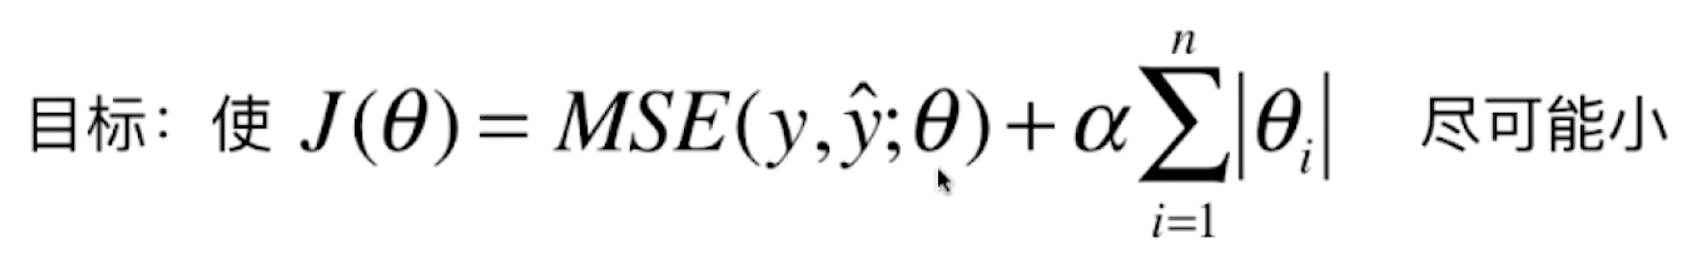

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3., 3., size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0., 1., size=100)

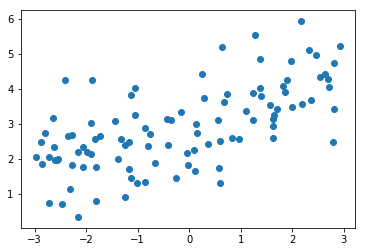

In [3]:
plt.scatter(x, y)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.9401086890128

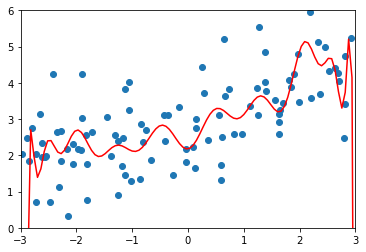

In [7]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()
    
plot_model(poly_reg)

## 使用 LASSO 回归

In [8]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg', Lasso(alpha=alpha))
    ])

### alpha = 0.01

In [9]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1496080843259968

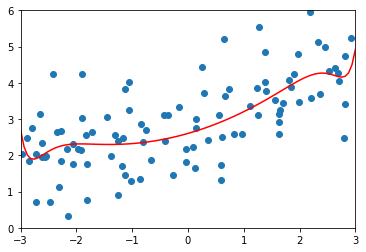

In [10]:
plot_model(lasso1_reg)

### alpha = 0.1

In [11]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1213911351818648

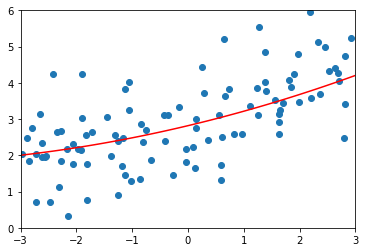

In [12]:
plot_model(lasso2_reg)

### alpha = 1

In [13]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8408939659515595

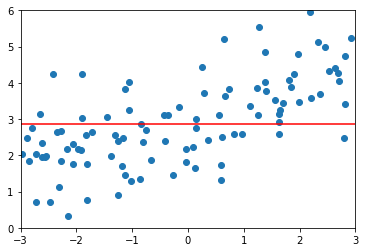

In [14]:
plot_model(lasso3_reg)

## 比较 Ridge 和 LASSO

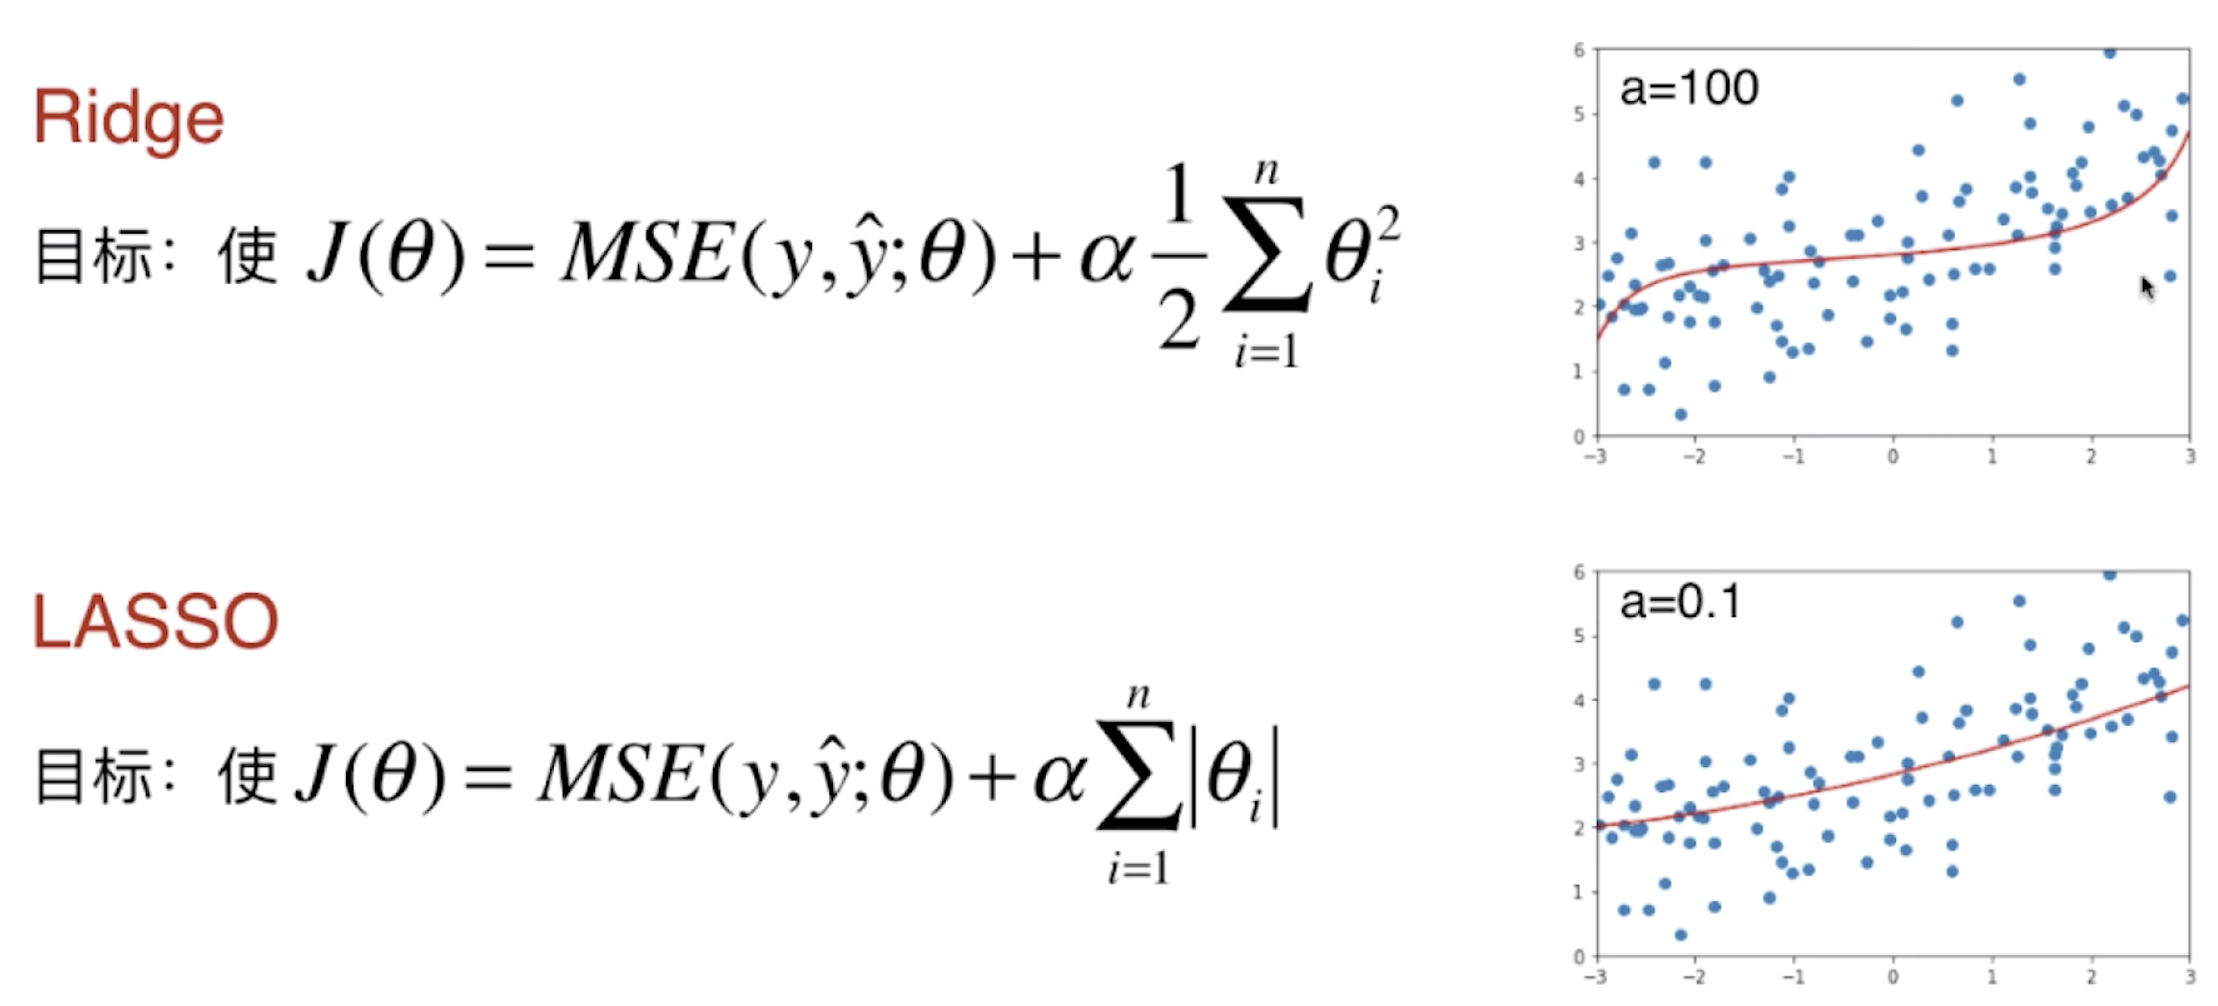

LASSO(Least Absolute Shrinkage and Selection Operator Regression)

**Ridge 呈现出的曲线不会像 LASSO 一样出现类似于直线的情况, 更准确(不会像 LASSO 一样丢掉特征)**

**LASSO 趋向于使得一部分`θ`值变为0, 所以可以作为 *特征选择* 用, 使模型的特征变少**

## 比较 LASSO 和 PCA

- LASSO 的方法是直接减少特征数, 做的是**特征选择**
- PCA 是通过空间转换将特征空间从高维空间转换为地位空间, 是降维

- 当特征有很强的语义的时候, PCA 的缺点是丢失语义, 此时用 LASSO 更好, 如房产数据, 这样做后续的分析会更高的保持可解释性
- 反之, 对于语义性不强的数据, 如图像数据, PCA 更好